In [1]:
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

## Tải bộ dữ liệu comment.json

In [2]:
import requests

url = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/entities/comment.json"
comment_df = pl.read_ndjson(url)
comment_df.head()

id,user_id,text,resource_id,create_time
str,i64,str,str,str
"""Cm_1""",10030806,"""测试评论""",null,"""2019-08-05 12:55:27"""
"""Cm_4""",1705400,"""嗯嗯""",null,"""2019-08-05 16:56:43"""
"""Cm_5""",10031537,"""是的，我也看不到""",null,"""2019-08-07 21:05:38"""
"""Cm_7""",10031502,"""大师傅as""",null,"""2019-08-09 13:06:06"""
"""Cm_12""",10031397,"""点赞""",null,"""2019-08-09 16:38:56"""


In [3]:
comment_df

id,user_id,text,resource_id,create_time
str,i64,str,str,str
"""Cm_1""",10030806,"""测试评论""",null,"""2019-08-05 12:55:27"""
"""Cm_4""",1705400,"""嗯嗯""",null,"""2019-08-05 16:56:43"""
"""Cm_5""",10031537,"""是的，我也看不到""",null,"""2019-08-07 21:05:38"""
"""Cm_7""",10031502,"""大师傅as""",null,"""2019-08-09 13:06:06"""
"""Cm_12""",10031397,"""点赞""",null,"""2019-08-09 16:38:56"""
…,…,…,…,…
"""Cm_17044056""",11526935,"""钢筋混凝土与砌体结构(2020秋)非常好""",null,"""2020-11-19 03:59:57"""
"""Cm_17044057""",11526935,"""钢筋混凝土与砌体结构(2020秋)非常好""",null,"""2020-11-19 04:00:15"""
"""Cm_17044058""",35197833,"""有""",null,"""2020-11-19 04:00:18"""


## Trực quan hóa dữ liệu

### Các cột dữ liệu

In [ ]:
comment_df.columns

['id', 'user_id', 'text', 'resource_id', 'create_time']

In [ ]:
comment_df.head(10)

id,user_id,text,resource_id,create_time
str,i64,str,str,str
"""Cm_1""",10030806,"""测试评论""",null,"""2019-08-05 12:55:27"""
"""Cm_4""",1705400,"""嗯嗯""",null,"""2019-08-05 16:56:43"""
"""Cm_5""",10031537,"""是的，我也看不到""",null,"""2019-08-07 21:05:38"""
"""Cm_7""",10031502,"""大师傅as""",null,"""2019-08-09 13:06:06"""
"""Cm_12""",10031397,"""点赞""",null,"""2019-08-09 16:38:56"""
"""Cm_13""",10031397,"""好滴""",null,"""2019-08-09 17:29:01"""
"""Cm_14""",10031528,"""很好，赞一个""",null,"""2019-08-09 17:41:54"""
"""Cm_16""",10031531,"""老师好""",null,"""2019-08-09 17:44:31"""
"""Cm_19""",10031356,"""好的""",null,"""2019-08-09 18:20:05"""


###Tương quan giữa dữ liệu Null và Not_Null

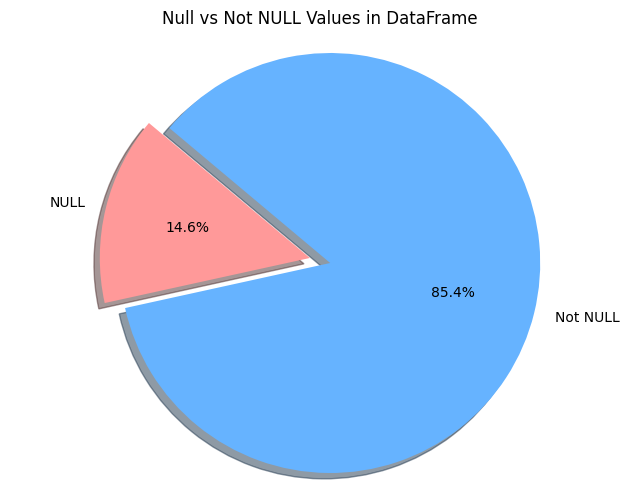

In [ ]:
comment_df = comment_df.to_pandas()

total_count = len(comment_df)

# Calculate the number of null values for each column
null_count = comment_df.isnull().sum()  # This gives the null count for each column

# Calculate the number of non-null values for each column
not_null_count = total_count - null_count

# Calculate percentages (column-wise)
null_percentage = (null_count / total_count) * 100
not_null_percentage = (not_null_count / total_count) * 100

# Convert percentages to total percentages (summing across columns)
total_null_percentage = (null_count.sum() / (total_count * len(comment_df.columns))) * 100
total_not_null_percentage = 100 - total_null_percentage  # Ensures that the sum is 100%

# Pie chart data
labels = ['NULL', 'Not NULL']
sizes = [total_null_percentage, total_not_null_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the 'NULL' slice

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plot
plt.title('Null vs Not NULL Values in DataFrame')  # Optional: Add a title
plt.show()

In [ ]:
resource_group = comment_df.groupby("resource_id").size().reset_index(name='count')
resource_group

,resource_id,count
0,Ex_1053431,1
1,Ex_1058388,1
2,Ex_1070388,2
3,Ex_1119567,5
4,Ex_1119656,2
...,...,...
100908,V_999703,1
100909,V_999920,3
100910,V_999938,1
100911,V_999979,1


###Thống kê số lượng comment người dùng

In [ ]:
user_id_grouped = comment_df.groupby("user_id").size().reset_index(name='count')

# Sort values by 'count' in descending order
user_id_grouped = user_id_grouped.sort_values('count', ascending=False)

# Get the top 20 users
user_id_grouped = user_id_grouped.head(20)

# Display the result
print(user_id_grouped)

         user_id  count
106296   8523466  19349
425717  21130929   6012
410095  19919624   4644
671392  30042257   4059
425685  21127560   3912
425726  21131459   3763
410092  19919548   2974
426517  21220105   2974
482699  25265704   2492
425707  21130094   2392
671701  30045726   2379
425713  21130862   2235
425998  21160109   2196
425752  21133533   2053
425711  21130725   1998
401953  19498847   1979
47115    4789799   1938
671442  30043027   1921
425715  21130881   1870
12115    1695165   1717


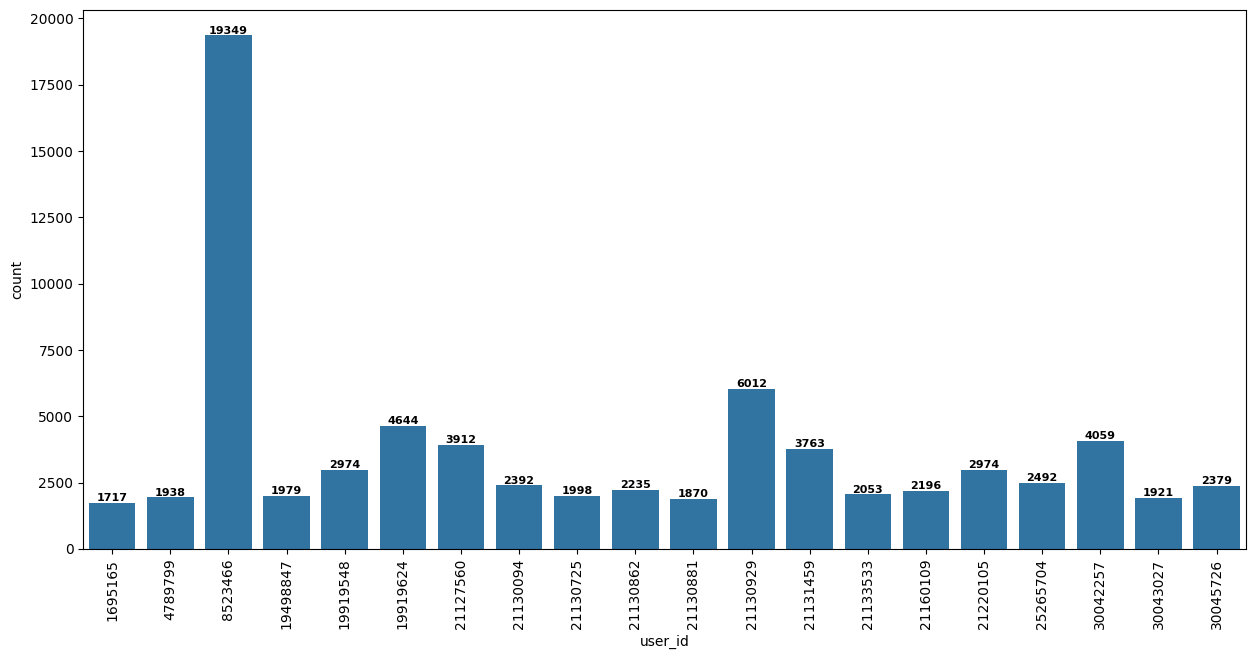

In [ ]:
import seaborn as sns
# Vẽ biểu đồ cột
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='user_id', y='count', data=user_id_grouped)
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize = 8
    )
plt.xlabel('user_id')
plt.ylabel('count')

plt.xticks(rotation = 90)
plt.show()

###Thống kê thời gian bình luận

In [ ]:
year_df = comment_df.groupby(comment_df['create_time'].str[:4]).size().reset_index(name='count')

# Rename the first column to 'year'
year_df.columns = ['year', 'count']

# Display the result
print(year_df)

   year    count
0  2019   724887
1  2020  7670254


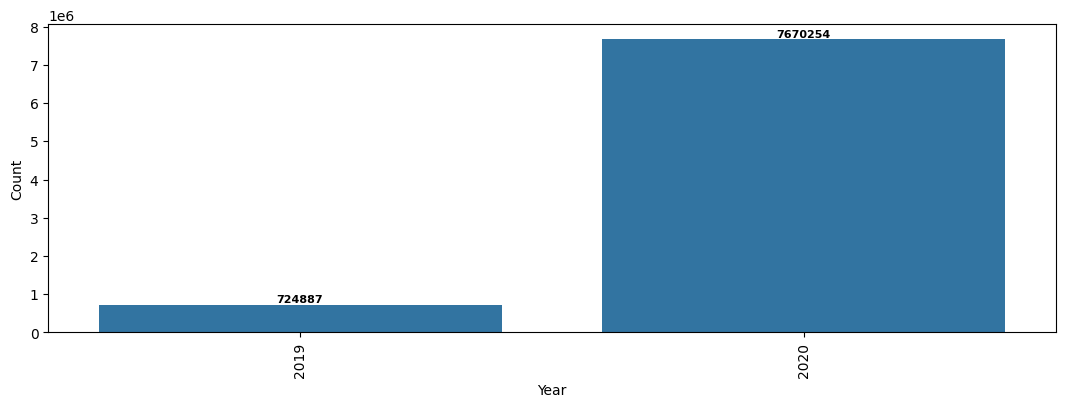

In [ ]:
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='year', y='count', data=year_df)
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize = 8
    )
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation = 90)
plt.show()

In [ ]:
comment_df['time'] = comment_df['create_time'].str[11:13]  # Extracting hour (12th and 13th characters)

# Group by the extracted time and count occurrences
time_df = comment_df.groupby('time').size().reset_index(name='count')

# Sort the DataFrame by 'count'
time_df = time_df.sort_values('count')

# Display the result
print(time_df)

   time   count
5    05   10164
4    04   10882
3    03   15841
6    06   25280
2    02   32721
1    01   61667
7    07   84878
0    00  140034
8    08  287509
23   23  324814
9    09  451125
22   22  455377
12   12  457253
18   18  470922
13   13  471483
19   19  489067
21   21  508428
20   20  522425
17   17  555622
14   14  569597
10   10  592815
11   11  595647
15   15  630657
16   16  630933


- Kết luận:

1.   Dữ liệu này cho thấy người dùng hoạt động tích cực hơn vào giữa ngày và chiều tối, đặc biệt là trong khoảng thời gian từ 15 giờ đến 16 giờ.

2.   Người dùng chủ yếu bình luận trong năm 2020



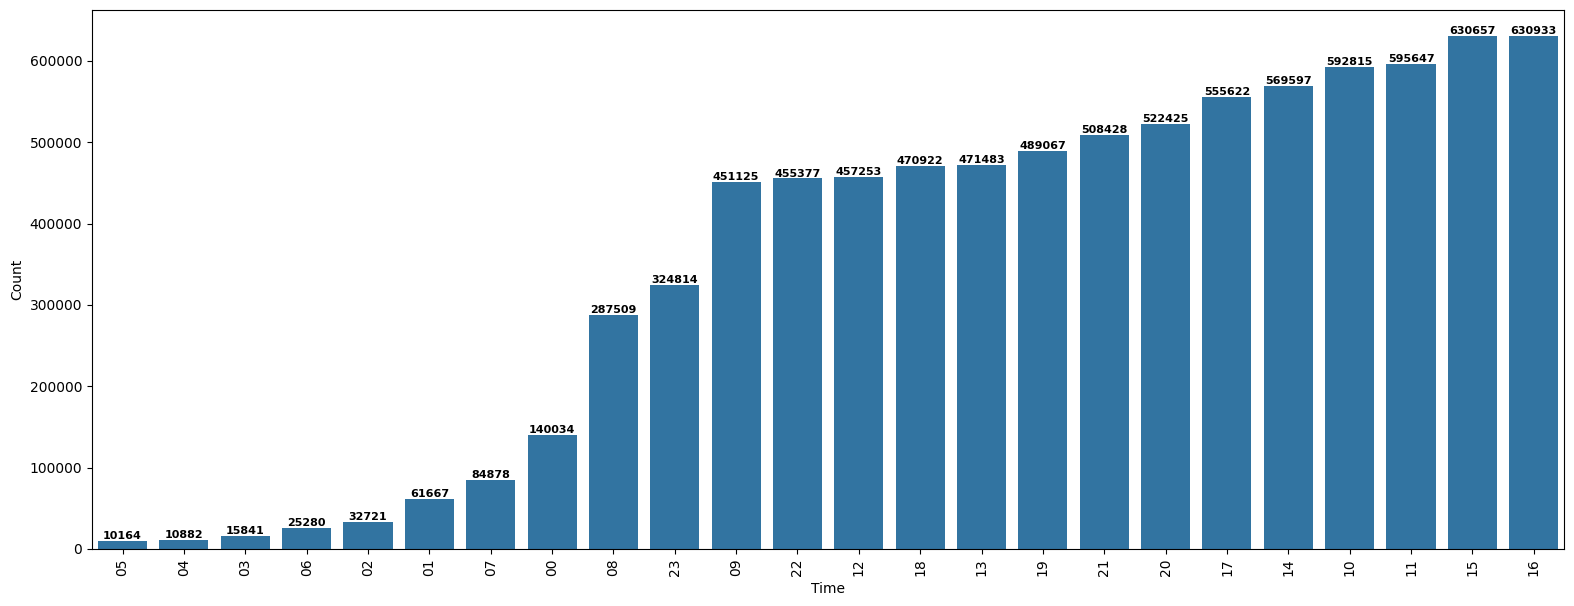

In [ ]:
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='time', y='count', data=time_df)
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize = 8
    )
plt.xlabel('Time')
plt.ylabel('Count')

plt.xticks(rotation = 90)
plt.show()

## Làm sạch dữ liệu

### Loại bỏ các dòng có resource_id null

In [ ]:
comment_df = comment_df.dropna(subset=['resource_id'])

###Gộp các dòng trừng lặp và tính số lượng lặp

In [ ]:
comment_df = comment_df.rename(columns={'size': "duplicate_count"})
comment_df.head()

,id,user_id,text,resource_id,create_time,time,duplicate_count
0,Cm_10000008,28756094,教师用声相关疾病的表征:1.失声\n\n2.嗓子干痒\n\n3.吞咽困难\n\n4.声音沙哑...,V_1384107,2020-05-27 21:53:41,21,1
1,Cm_10000016,22852778,😀,V_1593539,2020-05-27 21:53:48,21,1
2,Cm_10000023,29581184,打卡,V_1394195,2020-05-27 21:53:51,21,1
3,Cm_10000032,3921916,资产负债表从表内的逻辑上来看，列报资产是就按照流动性的高低，一般是流动性越快我们把它放在越前...,V_1348357,2020-05-27 21:53:56,21,1
4,Cm_10000033,5515129,打卡,V_1394187,2020-05-27 21:53:57,21,1
